In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
import joblib

import datetime

In [2]:
# Train
size = 'demo'
type_ = 'train'

X_train_file_path = f'./files/numpy/X_{type_}_{size}.npy'
y_train_file_path = f'./files/numpy/y_{type_}_{size}.npy'

X_train = np.load(X_train_file_path)
y_train = np.load(y_train_file_path)

# Validation 
size = 'demo'
type_ = 'validation'

X_val_file_path = f'./files/numpy/X_{type_}_{size}.npy'
y_val_file_path = f'./files/numpy/y_{type_}_{size}.npy'

X_val = np.load(X_val_file_path)
y_val = np.load(y_val_file_path)


print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(208646, 900)
(138462, 900)
(208646,)
(138462,)


In [3]:
# # Normalize the input data
# scaler_X = StandardScaler()
# X_train = scaler_X.fit_transform(X_train)
# X_val = scaler_X.transform(X_val)

# # Normalize the target data
# scaler_y = MinMaxScaler()
# y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_val = scaler_y.transform(y_val.reshape(-1, 1)).flatten()

In [4]:
# # Save the scalers
# joblib.dump(scaler_X, './files/models/scaler_X.pkl')
# joblib.dump(scaler_y, './files/models/scaler_y.pkl')

In [3]:
# Define the model
model = Sequential([
    tf.keras.Input(shape=(X_val.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.2),  # Adding Dropout layer after the first Dense layer
    Dense(128, activation='relu'),
    Dropout(0.2),  # Adding Dropout layer after the second Dense layer
    Dense(32, activation='relu'),
    Dropout(0.2),  # Adding Dropout layer after the third Dense layer
    Dense(1, activation='linear')
])

# Set a learning rate annealer
optimizer = Adam(learning_rate=0.1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)
# Compile the model
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape']) #'mse',


In [4]:
# Prepare TensorBoard callback
log_dir = "files/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
num_epochs = 15
batch_size = 64
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    
                    callbacks=[tensorboard_callback, TqdmCallback(verbose=1), reduce_lr], #, ,early_stop
                    verbose=2)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/15
3261/3261 - 61s - loss: 1907.8571 - mae: 23.6600 - mape: 268.2426 - val_loss: 832.1315 - val_mae: 22.9852 - val_mape: 281.8786 - lr: 0.1000 - 61s/epoch - 19ms/step
Epoch 2/15
3261/3261 - 51s - loss: 843.5531 - mae: 23.1025 - mape: 288.1145 - val_loss: 832.1478 - val_mae: 23.2791 - val_mape: 293.3937 - lr: 0.1000 - 51s/epoch - 16ms/step
Epoch 3/15
3261/3261 - 56s - loss: 831.0486 - mae: 23.0997 - mape: 288.1836 - val_loss: 831.7583 - val_mae: 23.0714 - val_mape: 285.4677 - lr: 0.1000 - 56s/epoch - 17ms/step
Epoch 4/15
3261/3261 - 52s - loss: 831.0336 - mae: 23.0999 - mape: 288.2588 - val_loss: 831.7542 - val_mae: 23.0847 - val_mape: 285.9915 - lr: 0.1000 - 52s/epoch - 16ms/step
Epoch 5/15
3261/3261 - 49s - loss: 986.6044 - mae: 23.1137 - mape: 288.2769 - val_loss: 832.8753 - val_mae: 23.2126 - val_mape: 290.8357 - lr: 0.1000 - 49s/epoch - 15ms/step
Epoch 6/15

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.05000000074505806.
3261/3261 - 84s - loss: 831.8275 - mae: 23.

In [5]:
pd.DataFrame(history.history)

,loss,mae,mape,val_loss,val_mae,val_mape,lr
0,1907.857056,23.660013,268.242615,832.131470,22.985184,281.878571,0.10000
1,843.553101,23.102543,288.114502,832.147766,23.279078,293.393738,0.10000
2,831.048645,23.099667,288.183563,831.758301,23.071423,285.467651,0.10000
3,831.033630,23.099892,288.258820,831.754211,23.084686,285.991486,0.10000
4,986.604431,23.113668,288.276947,832.875305,23.212570,290.835724,0.10000
5,831.827454,23.102049,288.469818,831.971436,22.965607,281.311707,0.10000
6,830.935242,23.100004,288.273804,831.963684,22.967770,281.398834,0.05000
7,830.937012,23.094254,288.052582,831.763733,23.066923,285.291412,0.05000
8,830.873901,23.095430,288.109192,831.792969,23.152754,288.661896,0.02500
9,830.863708,23.097807,288.242310,831.765808,23.062674,285.125244,0.02500


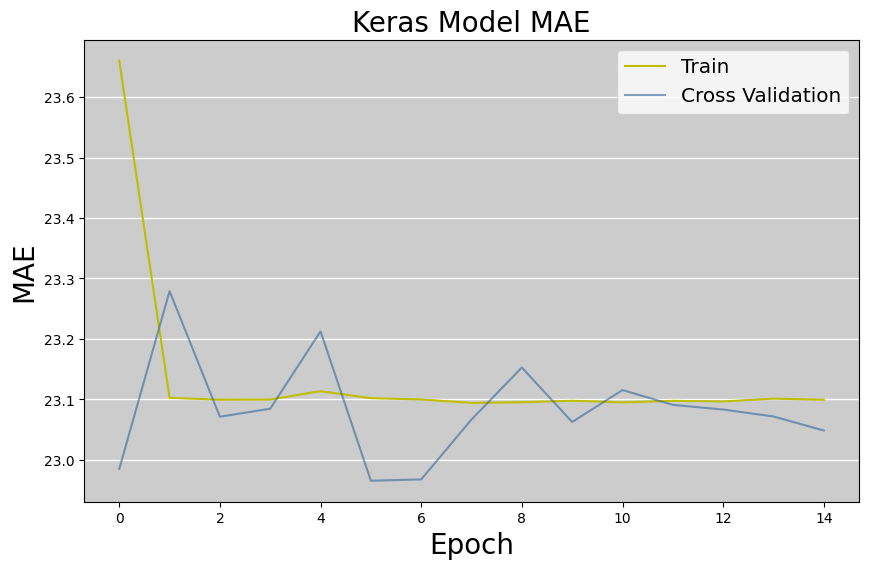

In [6]:
plt.figure(figsize=(10,6))
plt.plot(history.history['mae'], color='y')
plt.plot(history.history['val_mae'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model MAE',size=20)
plt.ylabel('MAE',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='upper right')
plt.show()

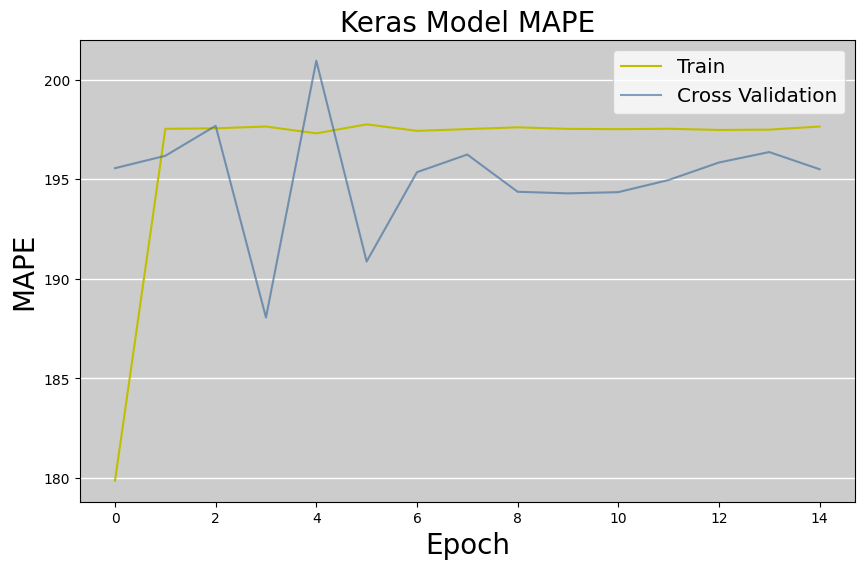

In [10]:
plt.figure(figsize=(10,6))
plt.plot(history.history['mape'], color='y')
plt.plot(history.history['val_mape'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model MAPE',size=20)
plt.ylabel('MAPE',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='upper right')
plt.show()

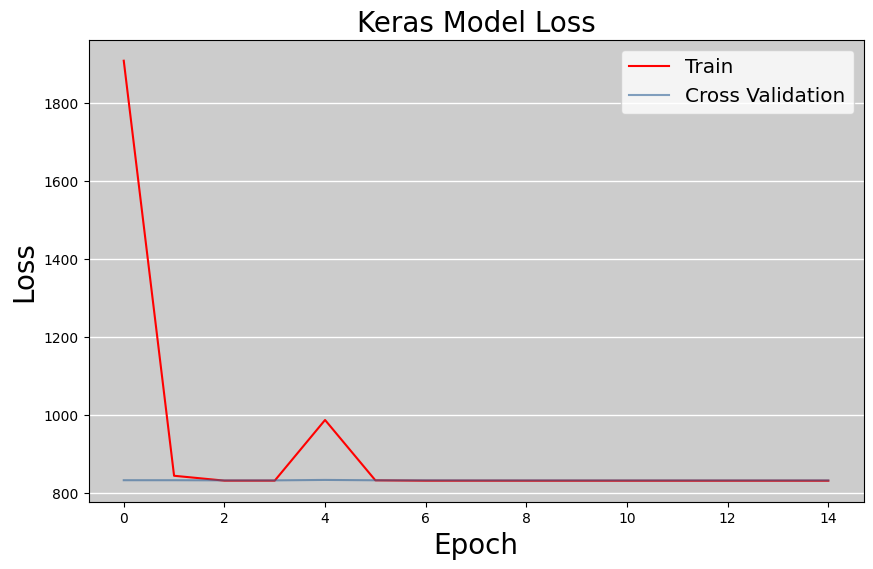

In [7]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model Loss',size=20)
plt.ylabel('Loss',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='upper right')
plt.show()

In [8]:
# Evaluate the model
train_loss, train_mse,train_mae,train_acc = model.evaluate(X_train, y_train, verbose=1)
test_loss, test_mse,test_mae,test_acc = model.evaluate(X_val, y_val, verbose=1)

3658/3658 [==============================] - 14s 4ms/step - loss: 312.7184 - mse: 312.7184 - mae: 13.3204 - mape: 168.4264


In [8]:
# Save the 
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_file_path = f'./files/models/model_{now}.h5py'
print(model_file_path)
model.save(model_file_path)

./files/models/model_20240716-221043.h5py
INFO:tensorflow:Assets written to: ./files/models/model_20240716-221043.h5py\assets


INFO:tensorflow:Assets written to: ./files/models/model_20240716-221043.h5py\assets
